In [9]:
def castit(solution, client, prefix, reqs, p95, total, vm_mbytes):
    return solution, client, prefix, float(reqs), float(p95), int(total), float(vm_mbytes)

dataset = list(map(lambda row: castit(*row.split("\t")), """Solution	Client	Prefix	RPS	P95	Requests	Virtual Memory (mbytes)
in_memory	c1	+1983248	32.1807	0.0659	1931	252.171875
in_memory	c1	+344999813123	8.6660	0.2218	527	5.420898438
in_memory	c1	+6983248	5.0452	0.3115	304	614.09375
in_memory	c2	+1983248	57.7870	0.0718	3468	324.6835938
in_memory	c2	+344999813123	6.3924	0.6750	384	5.420898438
in_memory	c2	+6983248	5.4886	0.5607	331	614.09375
in_memory	c4	+1983248	68.2657	0.1170	4101	468.8203125
in_memory	c4	+344999813123	9.8017	0.5734	591	5.420898438
in_memory	c4	+6983248	5.6223	0.9602	339	614.09375
in_memory	c8	+1983248	70.7178	0.1745	4248	5.420898438
in_memory	c8	+344999813123	10.1986	1.3419	604	614.09375
in_memory	c8	+6983248	5.4213	2.4742	328	686.0976563
trie	c1	+1983248	38.5478	0.0567	2313	481.3046875
trie	c1	+344999813123	38.6117	0.0563	2317	556.6367188
trie	c1	+6983248	29.3276	0.0661	1760	631.28125
trie	c2	+1983248	59.4053	0.0667	3567	554.3242188
trie	c2	+344999813123	59.0508	0.0671	3545	556.6367188
trie	c2	+6983248	45.0281	0.0838	2703	631.28125
trie	c4	+1983248	85.5034	0.0865	5133	555.8671875
trie	c4	+344999813123	85.1390	0.0853	5110	630.0820313
trie	c4	+6983248	53.0666	0.1217	3187	631.28125
trie	c8	+1983248	86.6713	0.1493	5210	556.6367188
trie	c8	+344999813123	50.7595	0.2454	3051	631.28125
trie	c8	+6983248	52.8789	0.2306	3176	703.2851563
mongo	c1	+1983248	17.9068	0.0979	1075	1806.675781
mongo	c1	+344999813123	21.0497	0.0834	1263	1878.894531
mongo	c1	+6983248	15.6482	0.1123	940	1782.847656
mongo	c2	+1983248	23.5120	0.1375	1413	1830.6875
mongo	c2	+344999813123	20.7613	0.1597	1246	1862.886719
mongo	c2	+6983248	17.5897	0.1790	1057	1822.867188
mongo	c4	+1983248	24.9715	0.2357	1500	1662.605469
mongo	c4	+344999813123	19.5361	0.2881	1175	181.4863281
mongo	c4	+6983248	18.6514	0.2995	1122	1830.871094
mongo	c8	+1983248	25.9891	0.4105	1563	193.4921875
mongo	c8	+344999813123	19.0651	0.5541	1151	181.4863281
mongo	c8	+6983248	19.4572	0.5419	1172	1798.855469
postgres_async	c1	+1983248	1.9218	0.6286	116	216.3007813
postgres_async	c1	+344999813123	3.3146	0.4299	199	576.8203125
postgres_async	c1	+6983248	1.9564	0.6399	118	648.8242188
postgres_async	c2	+1983248	3.0120	0.7817	182	288.3046875
postgres_async	c2	+344999813123	5.1956	0.4844	303	576.8203125
postgres_async	c2	+6983248	3.1099	0.7607	188	648.8242188
postgres_async	c4	+1983248	2.8943	1.5864	175	432.5625
postgres_async	c4	+344999813123	5.3735	0.9603	324	576.8203125
postgres_async	c4	+6983248	3.1667	1.6210	193	648.8242188
postgres_async	c8	+1983248	2.9677	3.2192	184	576.8203125
postgres_async	c8	+344999813123	5.0884	2.2445	313	648.8242188
postgres_async	c8	+6983248	3.1525	3.1230	194	648.8242188
redis	c1	+1983248	32.4600	0.0634	1948	275.4023438
redis	c1	+344999813123	33.1870	0.0600	1992	564.1679688
redis	c1	+6983248	34.5374	0.0594	2074	564.1679688
redis	c2	+1983248	48.0749	0.0749	2885	0.34765625
redis	c2	+344999813123	48.2283	0.0758	2894	564.1679688
redis	c2	+6983248	47.1857	0.0754	2832	564.1679688
redis	c4	+1983248	66.2139	0.1029	3974	491.6640625
redis	c4	+344999813123	66.0075	0.1009	3966	564.1679688
redis	c4	+6983248	66.1782	0.1016	3975	564.1679688
redis	c8	+1983248	69.0257	0.1762	4147	564.1679688
redis	c8	+344999813123	65.5904	0.1877	3940	564.1679688
redis	c8	+6983248	67.2937	0.1885	4040	63.6171875""".split("\n")[1:]))

import pandas as pd
df = pd.DataFrame(dict(
    solution = map(lambda x: x[0], dataset),
    clients = map(lambda x: x[1], dataset),
    prefix = map(lambda x: x[2], dataset),
    rps = map(lambda x: x[3], dataset),
    p95 = map(lambda x: x[4], dataset),
    totals = map(lambda x: x[5], dataset),
    vm_mbytes = map(lambda x: x[6], dataset),
))

solution_colors = ['rgb(0,204,150)', 'rgb(171,99,250)', 'rgb(233,86,63)', 'rgb(255,161,90)', 'rgb(99,110,251)']

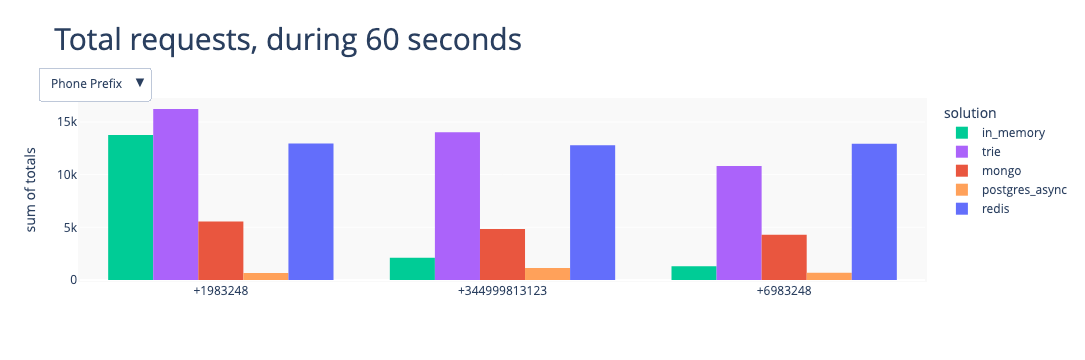

{"data":[{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"solution=in_memory<br>prefix=%{x}<br>sum of totals=%{y}<extra></extra>","legendgroup":"in_memory","marker":{"color":"rgb(0,204,150)","pattern":{"shape":""}},"name":"in_memory","offsetgroup":"in_memory","orientation":"v","showlegend":true,"x":["+1983248","+344999813123","+6983248","+1983248","+344999813123","+6983248","+1983248","+344999813123","+6983248","+1983248","+344999813123","+6983248"],"xaxis":"x","y":[1931,527,304,3468,384,331,4101,591,339,4248,604,328],"yaxis":"y","type":"histogram"},{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"solution=trie<br>prefix=%{x}<br>sum of totals=%{y}<extra></extra>","legendgroup":"trie","marker":{"color":"rgb(171,99,250)","pattern":{"shape":""}},"name":"trie","offsetgroup":"trie","orientation":"v","showlegend":true,"x":["+1983248","+344999813123","+6983248","+1983248","+344999813123","+6983248","+1983248","+344999813123","+6983248","+19832

In [24]:
import plotly.express as px

# 'stack', 'group', 'overlay', 'relative'
fig = px.histogram(
    df,
    x="prefix",
    y="totals", 
    color='solution', 
    barmode='group',
    color_discrete_sequence=solution_colors,
    title="Total requests, during 60 seconds",
)

# Add dropdown
fig.update_layout(
    xaxis={"title": "", "type": "category"},
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[
                        {"x": [df["prefix"]]},
                        {"xaxis": {"title": "", "type": "category"}},
                    ],
                    label="Phone Prefix",
                    method="update"
                ),
                dict(
                    args=[
                        {"x": [df["clients"]]},
                        {"xaxis": {"title": "", "type": "category"}},
                    ],
                    label="HTTP Clients",
                    method="update"
                ),
            ]),
            direction="down",
            showactive=True,
            xanchor="left",
            yanchor="bottom"
        )
    ],
    annotations=[
        #dict(text="X-Axis", x=0, xref="paper", y=1.18, yref="paper", align="left", showarrow=False)
    ],
    title_font_size=30,
    plot_bgcolor="rgba(236, 236, 236, 0.3)",
    width=825,
    margin=dict(
        b=80,
        l=80,
        r=80,
        t=100,
        pad=2
    ),
)   
fig.show()
print(fig.to_json())

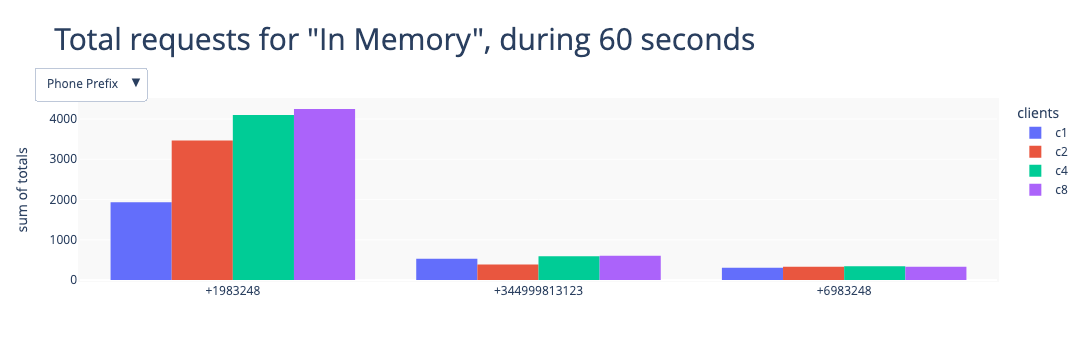

{"data":[{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"clients=c1<br>prefix=%{x}<br>sum of totals=%{y}<extra></extra>","legendgroup":"c1","marker":{"color":"rgb(99,110,251)","pattern":{"shape":""}},"name":"c1","offsetgroup":"c1","orientation":"v","showlegend":true,"x":["+1983248","+344999813123","+6983248"],"xaxis":"x","y":[1931,527,304],"yaxis":"y","type":"histogram"},{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"clients=c2<br>prefix=%{x}<br>sum of totals=%{y}<extra></extra>","legendgroup":"c2","marker":{"color":"rgb(233,86,63)","pattern":{"shape":""}},"name":"c2","offsetgroup":"c2","orientation":"v","showlegend":true,"x":["+1983248","+344999813123","+6983248"],"xaxis":"x","y":[3468,384,331],"yaxis":"y","type":"histogram"},{"alignmentgroup":"True","bingroup":"x","histfunc":"sum","hovertemplate":"clients=c4<br>prefix=%{x}<br>sum of totals=%{y}<extra></extra>","legendgroup":"c4","marker":{"color":"rgb(0,204,150)","pattern":{"shape"

In [25]:
import plotly.express as px

# 'stack', 'group', 'overlay', 'relative'
fig = px.histogram(
    df[df["solution"]=="in_memory"],
    x="prefix",
    y="totals", 
    color='clients', 
    barmode='group',
    color_discrete_sequence=["rgb(99,110,251)", "rgb(233,86,63)", "rgb(0,204,150)", "rgb(171,99,250)", "rgb(255,161,90)"],
    title="Total requests for \"In Memory\", during 60 seconds",
)

# Add dropdown
fig.update_layout(
    xaxis={"title": "", "type": "category"},
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[
                        {"x": [df["prefix"]]},
                        {"xaxis": {"title": "", "type": "category"}},
                    ],
                    label="Phone Prefix",
                    method="update"
                ),
            ]),
            direction="down",
            showactive=True,
            xanchor="left",
            yanchor="bottom"
        )
    ],
    annotations=[
        # dict(text="X-Axis", x=0, xref="paper", y=1.18, yref="paper", align="left", showarrow=False)
    ],
    title_font_size=30,
    plot_bgcolor="rgba(236, 236, 236, 0.3)",
    width=825,
    margin=dict(
        b=80,
        l=80,
        r=80,
        t=100,
        pad=2
    ),
)     
fig.show()
print(fig.to_json())

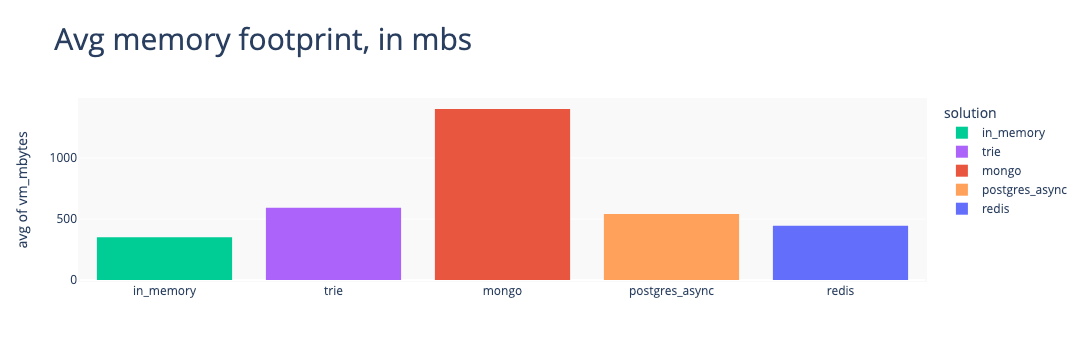

{"data":[{"alignmentgroup":"True","bingroup":"x","histfunc":"avg","hovertemplate":"solution=%{x}<br>avg of vm_mbytes=%{y}<extra></extra>","legendgroup":"in_memory","marker":{"color":"rgb(0,204,150)","pattern":{"shape":""}},"name":"in_memory","offsetgroup":"in_memory","orientation":"v","showlegend":true,"x":["in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory","in_memory"],"xaxis":"x","y":[252.171875,5.420898438,614.09375,324.6835938,5.420898438,614.09375,468.8203125,5.420898438,614.09375,5.420898438,614.09375,686.0976563],"yaxis":"y","type":"histogram"},{"alignmentgroup":"True","bingroup":"x","histfunc":"avg","hovertemplate":"solution=%{x}<br>avg of vm_mbytes=%{y}<extra></extra>","legendgroup":"trie","marker":{"color":"rgb(171,99,250)","pattern":{"shape":""}},"name":"trie","offsetgroup":"trie","orientation":"v","showlegend":true,"x":["trie","trie","trie","trie","trie","trie","trie","trie","trie","trie","trie

In [42]:
import plotly.express as px

# 'stack', 'group', 'overlay', 'relative'
fig = px.histogram(
    df,
    x="solution",
    y="vm_mbytes", 
    color='solution',
    histfunc="avg",
    color_discrete_sequence=solution_colors,
    title="Avg memory footprint, in mbs",
)

# Add dropdown
fig.update_layout(
    xaxis={"title": "", "type": "category"},
    title_font_size=30,
    plot_bgcolor="rgba(236, 236, 236, 0.3)",
    width=825,
    margin=dict(
        b=80,
        l=80,
        r=80,
        t=100,
        pad=2
    ),
)   
fig.show()
print(fig.to_json())

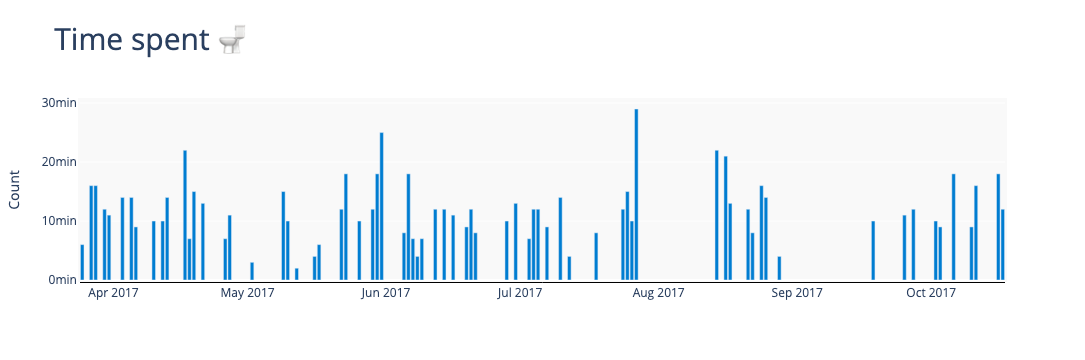

{"data":[{"marker":{"color":"rgb(0, 125, 209)"},"type":"bar","x":["2017-03-25","2017-03-27","2017-03-28","2017-03-30","2017-03-31","2017-04-03","2017-04-05","2017-04-06","2017-04-10","2017-04-12","2017-04-13","2017-04-17","2017-04-18","2017-04-19","2017-04-21","2017-04-26","2017-04-27","2017-05-02","2017-05-09","2017-05-10","2017-05-12","2017-05-16","2017-05-17","2017-05-22","2017-05-23","2017-05-26","2017-05-29","2017-05-30","2017-05-31","2017-06-05","2017-06-06","2017-06-07","2017-06-08","2017-06-09","2017-06-12","2017-06-14","2017-06-16","2017-06-19","2017-06-20","2017-06-21","2017-06-28","2017-06-30","2017-07-03","2017-07-04","2017-07-05","2017-07-07","2017-07-10","2017-07-12","2017-07-18","2017-07-24","2017-07-25","2017-07-26","2017-07-27","2017-08-14","2017-08-16","2017-08-17","2017-08-21","2017-08-22","2017-08-24","2017-08-25","2017-08-28","2017-09-18","2017-09-25","2017-09-27","2017-10-02","2017-10-03","2017-10-06","2017-10-10","2017-10-11","2017-10-16","2017-10-17"],"y":[6,16,

In [19]:
buckets = dict([(seconds, int(seconds / 60)) for seconds in range(0, 2000, 60)[1:]])
x_data, y_data = [], []
for key, values in content.items():
    x_data.append(key)
    total_seconds = sum(map(lambda v: v.total_seconds(), values))
    for seconds, legend in buckets.items():
        if total_seconds < seconds:
            y_data.append(legend)
            break
            
fig = go.Figure(
    layout={
        "title": "Time spent 🚽",
        "title_font_size": 30,
        "plot_bgcolor": "rgba(236, 236, 236, 0.3)",
        "xaxis": {
            "title": " ",
            "linecolor": "#000",
            "linewidth": 1,
        },
        "yaxis": {
            "title": "Count",
            "ticksuffix": "min"
        },
        "width":825,
        "margin":{
            "b":80,
            "l":80,
            "r":80,
            "t":100,
            "pad":2
       },
    }
)
fig.add_trace(go.Bar(
    x=x_data,
    y=y_data,
    marker_color='rgb(0, 125, 209)'
))
fig.show()
print(fig.to_json())

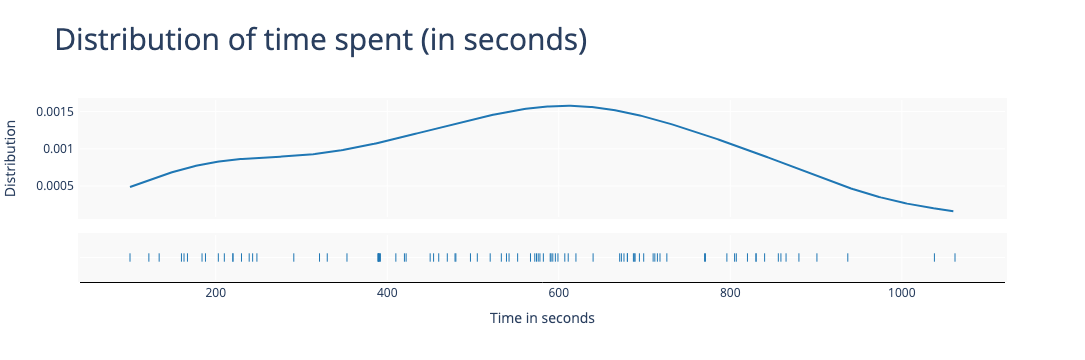

{"data":[{"legendgroup":"Time in seconds","marker":{"color":"rgb(31, 119, 180)"},"mode":"lines","name":"Time in seconds","showlegend":true,"type":"scatter","x":[100.0,101.924,103.848,105.772,107.696,109.62,111.544,113.468,115.392,117.316,119.24,121.164,123.088,125.012,126.936,128.86,130.784,132.708,134.632,136.55599999999998,138.48,140.404,142.328,144.252,146.176,148.1,150.024,151.948,153.872,155.796,157.72,159.644,161.56799999999998,163.492,165.416,167.34,169.264,171.188,173.112,175.036,176.95999999999998,178.88400000000001,180.808,182.732,184.656,186.57999999999998,188.50400000000002,190.428,192.352,194.276,196.2,198.124,200.048,201.97199999999998,203.89600000000002,205.82,207.744,209.668,211.59199999999998,213.51600000000002,215.44,217.364,219.288,221.212,223.136,225.06,226.98399999999998,228.908,230.832,232.756,234.68,236.604,238.528,240.452,242.376,244.3,246.224,248.148,250.072,251.996,253.92,255.844,257.76800000000003,259.692,261.616,263.53999999999996,265.464,267.38800000000003,

In [20]:
time_takens = sum([list(map(lambda v: v.total_seconds(), value)) for value in content.values()], [])
data = []
for time_taken in time_takens:
    for seconds in range(0, 2000, 60)[1:]:
        if time_taken < seconds:
            data.append(seconds)
            break

fig = ff.create_distplot([time_takens], ['Time in seconds'], show_hist=False, curve_type='kde')
fig.update_layout({
        "showlegend": False,
        "title": "Distribution of time spent (in seconds)",
        "title_font_size": 30,
        "plot_bgcolor": "rgba(236, 236, 236, 0.3)",
        "xaxis": {
            "title": "Time in seconds",
            "linecolor": "#000",
            "linewidth": 1,
        },
        "yaxis": {
            "title": "Distribution",
            "ticksuffix": "  "
        },
        "width":825,
        "margin":{
            "b":80,
            "l":80,
            "r":80,
            "t":100,
            "pad":2
       }})
fig.show()
print(fig.to_json())